# Работа 4.1. Определение энергии $\alpha$-частиц по величине их пробега в воздухе.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

%matplotlib inline
sns.set()

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Введение.
В данной работе измеряется пробег $\alpha$-частиц в воздухе тремя способами: с помощью счётчика Гейгера, сцинтилляционной и ионизационной камер. По полученным данным определяется энергия частиц.
Используется изотоп ${^{239}_{}Pu}$ с периодом полураспада $T=2.44 \cdot 10^{4} лет$ и средней энергией $\alpha$-частиц $5.15 МЭв$.
В таком диапазоне энергий связь длины свободного пробега $R$ и энергии частиц $E$ описывается эмпирическим соотношением:

$R = AE^{\frac{3}{2}}$,

где $A = 0.32$ для атмосферного давления и температуры воздуха $15 ^{\circ}C$.

## Определение пробега и энергии $\alpha$-частиц с помощью сцинтилляционного счётчика.

In [2]:
# Cчитывание данных
scint_data = pd.read_excel("scint.xlsx")
scint_data["N_err"] = np.sqrt(scint_data["N"])

P         -15.252511
const    2995.005327
dtype: float64 
 P         0.430231
const    48.616931
dtype: float64
R_scint_p = 196.36145455996964 +- 3.1874705649705857 торр


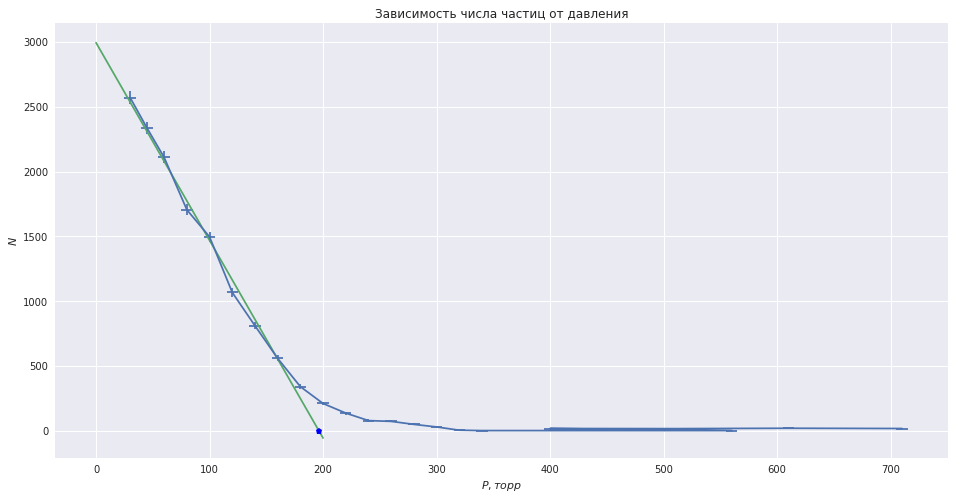

In [3]:
# Построение графика зависимости N=N(P)
fig, ax = plt.subplots(1, figsize=(16, 8))
ax.errorbar(x=scint_data["P"], y=scint_data["N"],
            xerr=scint_data["P_err"], yerr=scint_data["N_err"])
ax.set_title("Зависимость числа частиц от давления")
ax.set_xlabel("$P, торр$")
ax.set_ylabel("$N$")
# Апроксимация линейного участка кривой прямой (первые девять точек)
X = scint_data["P"][0:9]
Y = scint_data["N"][0:9]
model = sm.OLS(Y, sm.add_constant(X))
res = model.fit()
params = res.params[::-1]
error = res.bse[::-1]
print(params, "\n", error)
straight_line = np.poly1d(params)
inter = np.linspace(0, 200, 100)
ax.plot(inter, straight_line(inter))
# Пересечение прямой с горизониальной осью
R_scint_p = straight_line.roots[0]
R_scint_error_p = abs(error[1]/params[0])
plt.plot(R_scint_p, 0, "bp")
print("R_scint_p =", R_scint_p, "+-", R_scint_error_p, "торр")

In [4]:
# Рассчёт длины и энергии свободного пробега
R_scint = 9*(R_scint_p/760)
R_scint_error = 9*(R_scint_error_p/760)
print("R_scint =", R_scint, "+-", R_scint_error, "см")
E_scint = (R_scint/0.32)**(2/3)
E_scint_error = (2/3)*(1/0.32)*(R_scint/0.32)**(-1/3)*R_scint_error
print("E_scint =", E_scint, "+-", E_scint_error, "МЭв")

R_scint = 2.325333014525956 +- 0.037746361953599046 см
E_scint = 3.7516598273576776 +- 0.04059963566095609 МЭв


## Определение пробега и энергии $\alpha$-частиц с помощью ионизационной камеры.

In [5]:
# Cчитывание данных
ion_data = pd.read_excel("ion.xlsx")

P          -0.089478
const    1097.707993
dtype: float64 
 P         0.072485
const    46.378806
dtype: float64
P         2.006218
const   -67.371878
dtype: float64 
 P        0.019028
const    6.097005
dtype: float64
R_ion_p = 555.9393021001364 +- 72.1044224255963 торр


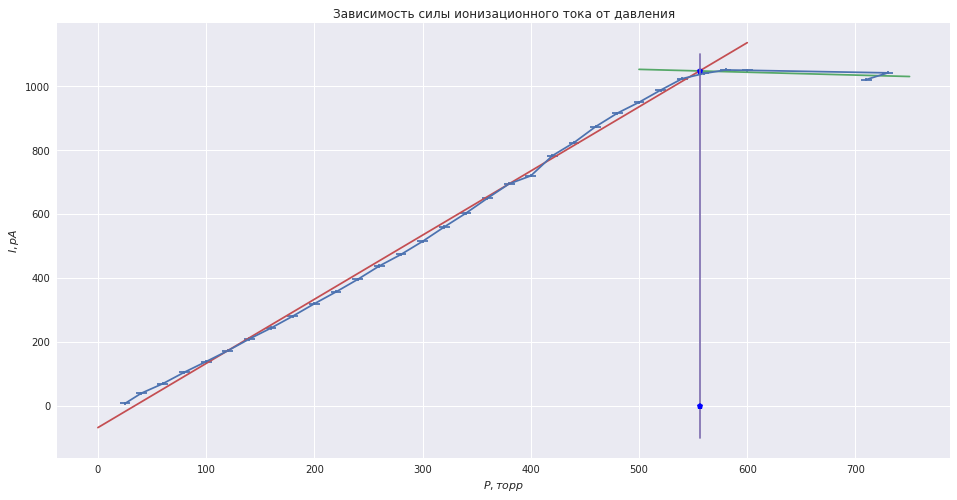

In [6]:
# Построение графика зависимости I=I(P)
fig, ax = plt.subplots(1, figsize=(16, 8))
ax.errorbar(x=ion_data["P"], y=ion_data["I"],
            xerr=ion_data["P_err"], yerr=ion_data["I_err"])
ax.set_title("Зависимость силы ионизационного тока от давления")
ax.set_xlabel("$P, торр$")
ax.set_ylabel("$I, pA$")
# Апроксимация линейных участков кривой прямой
# 1
X_1 = ion_data["P"][-5:]
Y_1 = ion_data["I"][-5:]
model_1 = sm.OLS(Y_1, sm.add_constant(X_1))
res_1 = model_1.fit()
params_1 = res_1.params[::-1]
error_1 = res_1.bse[::-1]
print(params_1, "\n", error_1)
straight_line_1 = np.poly1d(params_1)
inter_1 = np.linspace(500, 750, 100)
ax.plot(inter_1, straight_line_1(inter_1))
# 2
X_2 = ion_data["P"][:-5]
Y_2 = ion_data["I"][:-5]
model_2 = sm.OLS(Y_2, sm.add_constant(X_2))
res_2 = model_2.fit()
params_2 = res_2.params[::-1]
error_2 = res_2.bse[::-1]
print(params_2, "\n", error_2)
straight_line_2 = np.poly1d(params_2)
inter_2 = np.linspace(0, 600, 100)
ax.plot(inter_2, straight_line_2(inter_2))
# Пересечение прямых друг с другом
differ = straight_line_1 - straight_line_2
R_ion_p = differ.roots[0]
R_ion_error_p = abs(((params_1[1]**2+params_2[1]**2)**0.5)/params[0])
plt.plot(R_ion_p, straight_line_1(R_ion_p), "bp")
line = np.linspace(-100, 1100, 1000)
plt.plot([R_ion_p]*len(line), line)
plt.plot(R_ion_p, 0, "bp")
print("R_ion_p =", R_ion_p, "+-", R_ion_error_p, "торр")

In [7]:
# Рассчёт длины и энергии свободного пробега
R_ion = (R_ion_p/760)*((273+15)/296)*9.5
R_ion_error = (R_ion_error_p/760)*((273+15)/296)*9.5
print("R_ion =", R_ion, "+-", R_ion_error, "см")
E_ion = (R_ion/0.32)**(2/3)
E_ion_error = (2/3)*(1/0.32)*(R_ion/0.32)**(-1/3)*R_ion_error
print("E_ion =", E_ion, "+-", E_ion_error, "МЭв")

R_ion = 6.761423944461119 +- 0.8769456781491441 см
E_ion = 7.6429108288332435 +- 0.6608487280074735 МЭв


## Определение пробега и энергии $\alpha$-частиц с помощью счётчика Гейгера.

In [8]:
# Cчитывание данных
geig_data = pd.read_excel("geig.xlsx")
geig_data = geig_data.sort_values(by="X")

X_direct    -4.253707
const       41.568502
dtype: float64 
 X_direct    0.617923
const       5.020031
dtype: float64
R_geig_ext = 9.77229921892908 +- 1.1801542571004546 см
R_geig_av = 7.88614960946454 +- 1.6689901560838076 см


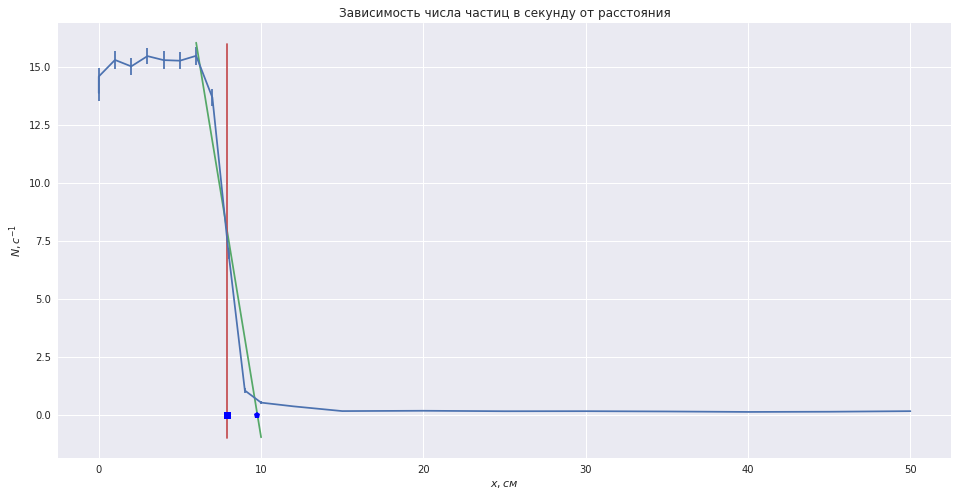

In [9]:
# Построение графика зависимости N=N(P)
fig, ax = plt.subplots(1, figsize=(16, 8))
ax.errorbar(x=geig_data["X_direct"], y=geig_data["F"],
            yerr=geig_data["F_err"])
ax.set_title("Зависимость числа частиц в секунду от расстояния")
ax.set_xlabel("$x, см$")
ax.set_ylabel("$N, с^{-1}$")
# Апроксимация линейного участка кривой прямой (первые девять точек)
X = geig_data["X_direct"][7:12]
Y = geig_data["F"][7:12]
model = sm.OLS(Y, sm.add_constant(X))
res = model.fit()
params = res.params[::-1]
error = res.bse[::-1]
print(params, "\n", error)
straight_line = np.poly1d(params)
inter = np.linspace(6, 10, 100)
ax.plot(inter, straight_line(inter))
# Пересечение прямой с горизониальной осью
R_geig_ext = straight_line.roots[0]
R_geig_error_ext = abs(error[1]/params[0])
plt.plot(R_geig_ext, 0, "bp")
print("R_geig_ext =", R_geig_ext, "+-", R_geig_error_ext, "см")
# Определение среднего пробега
R_geig_av = 0.5*(R_geig_ext+6)
line = np.linspace(-1, 16, 100)
plt.plot([R_geig_av]*len(line), line)
plt.plot(R_geig_av, 0, "bs")
R_geig_error_av = R_geig_error_ext*2**0.5
print("R_geig_av =", R_geig_av, "+-", R_geig_error_av, "см")

In [10]:
# Рассчёт энергии свободного пробега
E_geig_av = (R_geig_av/0.32)**(2/3)
E_geig_error_av = (2/3)*(1/0.32)*(R_geig_av/0.32)**(-1/3)*R_geig_error_av
print("E_geig_av =", E_geig_av, "+-", E_geig_error_av, "МЭв")
E_geig_ext = (R_geig_ext/0.32)**(2/3)
E_geig_error_ext = (2/3)*(1/0.32)*(R_geig_ext/0.32)**(-1/3)*R_geig_error_ext
print("E_geig_ext =", E_geig_ext, "+-", E_geig_error_ext, "МЭв")

E_geig_av = 8.468568843356332 +- 1.1948338742070803 МЭв
E_geig_ext = 9.770073972614572 +- 0.7865903497669746 МЭв
